# GMU ECE 527 - Computer Exercise #1
**Stewart Schuler - G01395779**\
**20240905**

First Load in Datasets

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA

# Load Digits Data set
from sklearn.datasets import load_digits
digits = load_digits()
images=digits.images
X_digits=digits.data
y_digits=digits.target 

# Load in MNIST Dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, parser='auto')
# Extract features and labels
X_mnist, y_mnist = mnist["data"], mnist["target"]
# Convert the DataFrame to a NumPy array
X_mnist = X_mnist.to_numpy()
y_mnist = y_mnist.astype(int)

## Exercise 1.1

#### Question for Discussion:
Question:\
If the goal is to randomly generate new digits, which approach is preferable:\
(a) Estimate p(x) from the entire dataset and then randomly select samples from this density, or\
(b) Estimate p(x|y = k) for each digit, and then select an integer k at random and draw a sample\
from p(x|y = k)?
If it does not make any difference which approach is used, explain why.\

Answer:\
Both methods are equally preferable as demonstrated by the following experiments.\
This is the case because when KDE is used it generates a density function for **X** and **X** is a specific value within the 
high dementional feature space. Therefore a random sample of a specific value of **X** will contain all the features (I.E. pixels) 
for that sample. Since we would expect KDE over the entire dataset to produce 10 distince high probability regions the sampled **X**
will be near one of those regions, and the resulting generated data will be similar to the trained data from that specific region's *k* value.\
Applying approach (b) will likewise produce a reasonable generated sample. But in that case there would only be one region of high probability corresponding
to the *k* value. 



**Experiment for case (a) - Using MNIST**\
Generated data looks good.

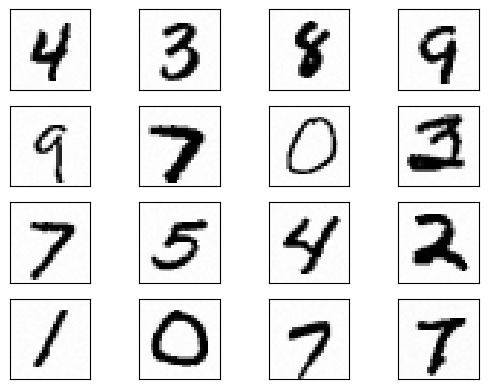

In [2]:
kde = KernelDensity().fit(X_mnist)
new_data = kde.sample(16)

# turn data into a 4x4 grid
new_data = new_data.reshape((4, 4, -1))

# plot resampled digits
fig, ax = plt.subplots(4, 4, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(4):
    for i in range(4):
        im = ax[i, j].imshow(new_data[i, j].reshape((28, 28)),
                    cmap=plt.cm.binary, interpolation='nearest')

**Experiment for case (b) - Using MNIST**\
For arbitrary values of k=4, Generated data looks good.

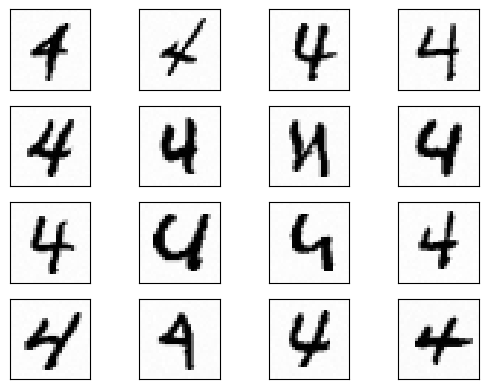

In [3]:
k = 4
kde = KernelDensity().fit(X_mnist[np.where(y_mnist==k)])
new_data = kde.sample(16)

# turn data into a 4x4 grid
new_data = new_data.reshape((4, 4, -1))

# plot resampled digits
fig, ax = plt.subplots(4, 4, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(4):
    for i in range(4):
        im = ax[i, j].imshow(new_data[i, j].reshape((28, 28)),
                    cmap=plt.cm.binary, interpolation='nearest')

#### Question for Discussion:
Question:\
(a) For the images in the digits dataset, the pixel values have 17 different grayscale values.
If the 64-dimensional feature space is partitioned into 64-dimensional unit cubes, with 17
bins for each feature, how many cubes (bins) will there be?\
(b) Repeat for the MNIST dataset where there are 256 different grayscale values and the
dimension of the feature space is 784.\
(c) Most of the d-dimensional feature space of pixels do not correspond to handwritten digits.
Some may just look like random noise such as the image on the left in the figure below
while others may be of some other object as shown on the right.
Discuss the importance of reducing the dimension of the feature space, i.e., is the curse
of dimensionality a serious issue for this problem? If so, speculate on what a reasonable
dimension might be.\

Answer:\
(a) The number of hypercubes can be determined using the following equation.
$$
    Hcubes = bins*features
$$
$$
    Hcubes = 17*64 = 1,088
$$

(b) Using the equation from (a).
$$
    Hcubes = 256*784 = 200,704
$$

(c) Reducing the dimension of the feature space reduces the number of data points needed to model the *Density Function*. The *curse of dimensionality* is an issue for this problem because the two datasets have 64 & 728 dimensions 
but both datasets have *Density Functions* which should be modeling only 10 classes - one for each digit. One would think that at absolute minimum to generate 10 seperable class regions the datasets would need to be at minimum
10 dimensions. Both datasets are well over the minimal number of dimensions which could mean an excess amount of data is needed to estiamte the *Density Function*.

#### Experiments:
(a) Beginning with bandwidth=1 and k=d/2, generate a set of 40 images by sampling the
KDE of the image dataset.


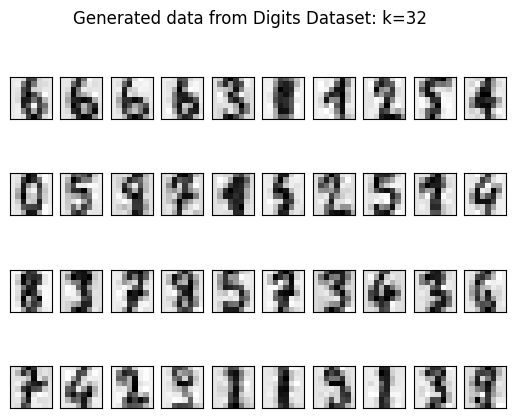

In [4]:
# Case Digits Dataset
bandwidth = 1
d = 64
k = int(d/2)

pca = PCA(k)
X_pc = pca.fit_transform(X_digits) # Reduce dimensionality to k
kde = KernelDensity(bandwidth=bandwidth).fit(X_pc) #KDE with bandwidth 1.0

# Generate 40 new samples
new_data = kde.sample(40).reshape((4, 10, -1))
# Inverse PCA
new_data = pca.inverse_transform(new_data)

# plot resampled digits
fig, ax = plt.subplots(4, 10, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(10):
    for i in range(4):
        im = ax[i, j].imshow(new_data[i, j].reshape((8, 8)),
                    cmap=plt.cm.binary, interpolation='nearest')
fig.suptitle(f"Generated data from Digits Dataset: k={k}")
plt.show()

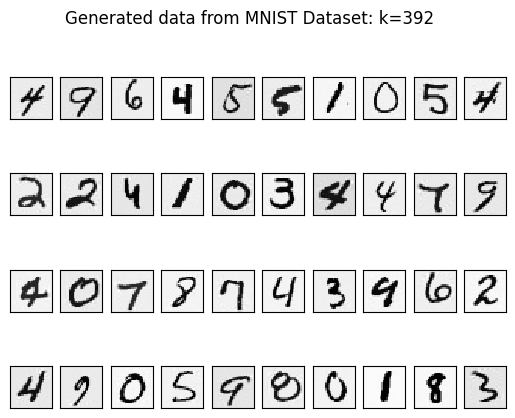

In [5]:
# Case MNIST Dataset
bandwidth = 1
d = 784
k = int(d/2)

pca = PCA(k)
X_pc = pca.fit_transform(X_mnist) # Reduce dimensionality to k
kde = KernelDensity(bandwidth=bandwidth).fit(X_pc) #KDE with bandwidth 1.0

# Generate 40 new samples
new_data = kde.sample(40).reshape((4, 10, -1))
# Inverse PCA
new_data = pca.inverse_transform(new_data)

# plot resampled digits
fig, ax = plt.subplots(4, 10, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(10):
    for i in range(4):
        im = ax[i, j].imshow(new_data[i, j].reshape((28, 28)),
                    cmap=plt.cm.binary, interpolation='nearest')
fig.suptitle(f"Generated data from MNIST Dataset: k={k}")
plt.show()

(b) Make a plot of explained_variance_ and determine what you think would be a good
number to use for the dimension of the reduced feature space, and use this number in a
principal components analysis of the dataset, and then generate a kernel density estimate
of the data and generate 40 digits by sampling the KDE.

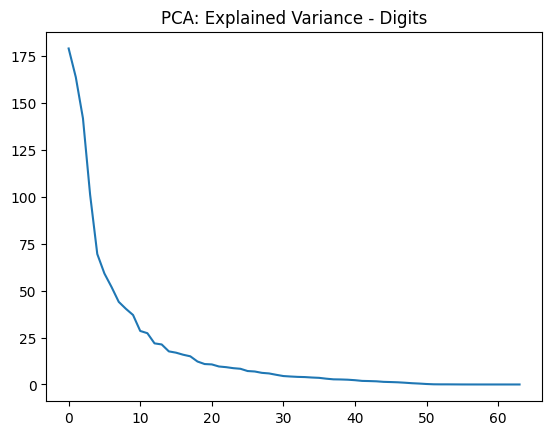

In [6]:
pca = PCA()
data = pca.fit_transform(X_digits)
v = pca.explained_variance_
plt.plot(v)
plt.title("PCA: Explained Variance - Digits") 
plt.show()

From above plot a princial compoenents value of 10 is chosen.

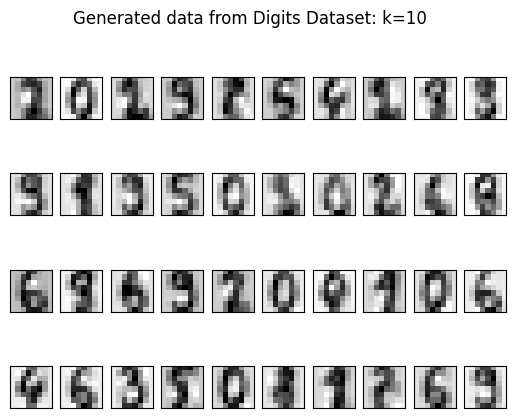

In [7]:
# Case Digits Dataset
bandwidth = 1
principal_components = 10
pca = PCA(principal_components)
X_pc = pca.fit_transform(X_digits) # Reduce dimensionality to k
kde = KernelDensity(bandwidth=bandwidth).fit(X_pc) #KDE with bandwidth 1.0

# Generate 40 new samples
new_data = kde.sample(40).reshape((4, 10, -1))
# Inverse PCA
new_data = pca.inverse_transform(new_data)

# plot resampled digits
fig, ax = plt.subplots(4, 10, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(10):
    for i in range(4):
        im = ax[i, j].imshow(new_data[i, j].reshape((8, 8)),
                    cmap=plt.cm.binary, interpolation='nearest')
fig.suptitle(f"Generated data from Digits Dataset: k={principal_components}")
plt.show()

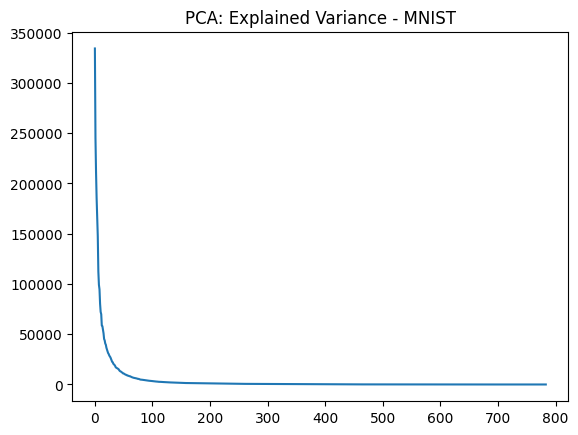

In [8]:
pca = PCA()
data = pca.fit_transform(X_mnist)
v = pca.explained_variance_
plt.plot(v)
plt.title("PCA: Explained Variance - MNIST") 
plt.show()

From above plot a princial compoenents value of 30 is chosen.

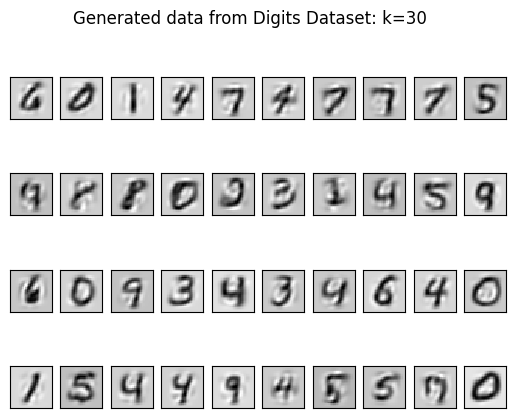

In [10]:
# Case MNIST Dataset
bandwidth = 1
principal_components = 30
pca = PCA(principal_components)
X_pc = pca.fit_transform(X_mnist) # Reduce dimensionality to k
kde = KernelDensity(bandwidth=bandwidth).fit(X_pc) #KDE with bandwidth 1.0

# Generate 40 new samples
new_data = kde.sample(40).reshape((4, 10, -1))
# Inverse PCA
new_data = pca.inverse_transform(new_data)

# plot resampled digits
fig, ax = plt.subplots(4, 10, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(10):
    for i in range(4):
        im = ax[i, j].imshow(new_data[i, j].reshape((28, 28)),
                    cmap=plt.cm.binary, interpolation='nearest')
fig.suptitle(f"Generated data from Digits Dataset: k={principal_components}")
plt.show()

(c) Discuss what you found in part (b). Are the images of high quality? What kind of
distortions do you observe?\

In both generated cases all digits are visually distinguishable. This would imply the by drastically reducing the dimensionality using PCA the number of remaining principal components is enough to model the 10 digits in a separable way.\
In the case of the MNIST dataset the images have a darker background. My intuition is this is because of the features we are throwing out most model the low variance white background near the edges which is generally the same across all 10 digits.
This can be further seen by looking at the background *near* the digits, these pixels are generally lighter than the edges becuase these pixel are used by other digits even if not being used by the generated specific digit. Thus their information 
is captured because it is needed to generate different digits. That information being captured manifests as the whiter background - truer to the training dataset.\
For the Digits dataset since there are less low variance white space pixels in the source images the explained variance curve has less low contribution values meaning a smaller percentage of the dimensions can be reduced compared to the MNIST. The generated Digits images are generally fuzzier around the edges of the writing when compared to the digits generated with more principaled components, but they look closer to those generated by $pc = k/2$ than the MNIST dataset does.

(d) Experiment with generating new digits using different values of k. What do you find
when k=1? Would a digit classifier perform well working with images of digits that have
only 5 principal components? What about 10?

Answer:\
As previously hypothesized, for a dataset with 10 classes (digits) I would expect the absolute minimum number of *principal components* needed to generated distinguished images to be 10. The following presented figures for both datasets appear to confirm this. When $k=1$ the generated images look like a mashup of multiple numbers are cannot be clearly assoicated to specific digit. For $k=5$, some of the generated images are clear separable digits while others are not. This is likly because the number of *principal components* is less than the number of true digits representation of multiple digits are compressed to a single component.

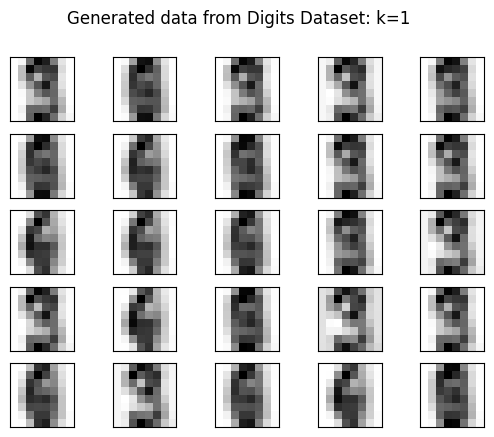

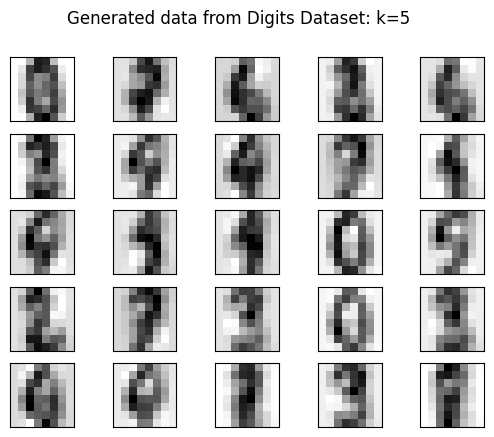

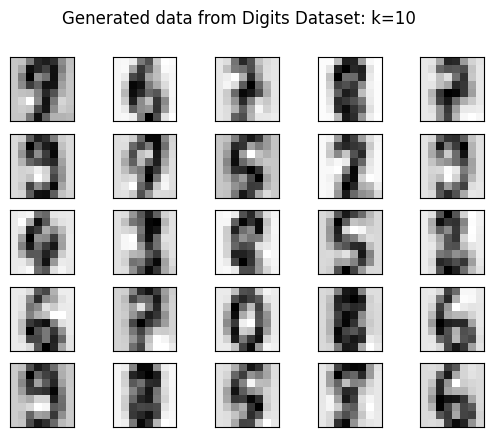

In [18]:
# Case Digits Dataset
bandwidth = 1
principal_components = [ 1, 5, 10 ]

for pc in principal_components:
    pca = PCA(pc)
    X_pc = pca.fit_transform(X_digits) # Reduce dimensionality to k
    kde = KernelDensity(bandwidth=bandwidth).fit(X_pc) #KDE with bandwidth 1.0
    
    # Generate 40 new samples
    new_data = kde.sample(25).reshape((5, 5, -1))
    # Inverse PCA
    new_data = pca.inverse_transform(new_data)
    
    # plot resampled digits
    fig, ax = plt.subplots(5, 5, subplot_kw=dict(xticks=[], yticks=[]))
    for j in range(5):
        for i in range(5):
            im = ax[i, j].imshow(new_data[i, j].reshape((8, 8)),
                        cmap=plt.cm.binary, interpolation='nearest')
    fig.suptitle(f"Generated data from Digits Dataset: k={pc}")
    plt.show()

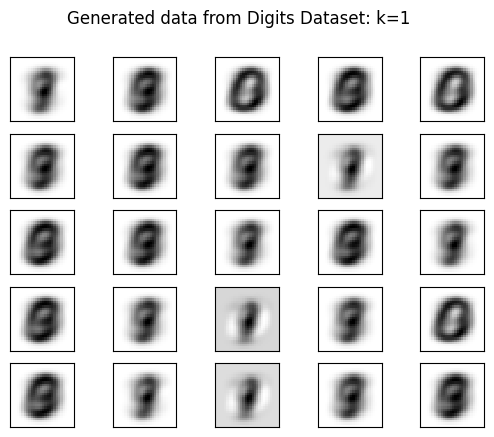

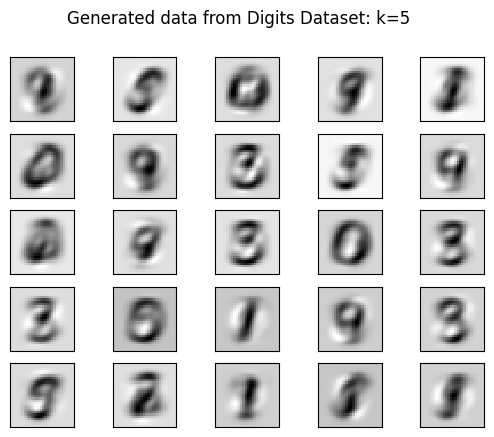

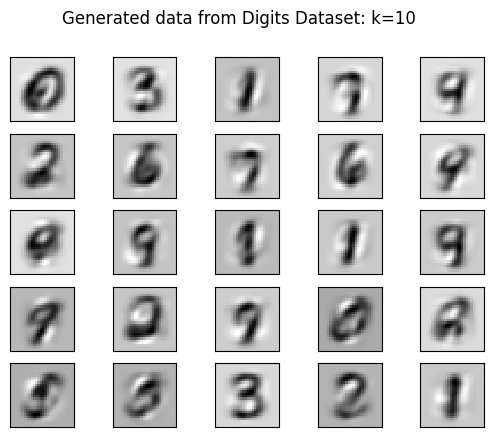

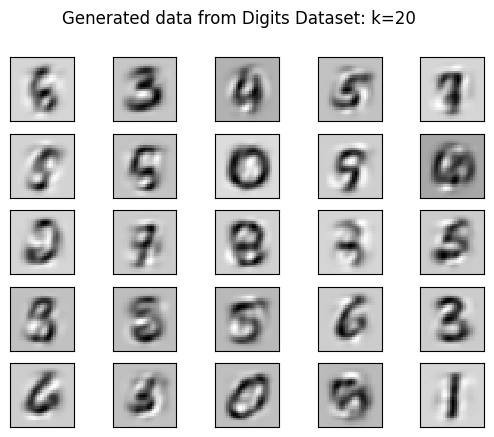

In [59]:
# Case MNIST Dataset
bandwidth = 1
principal_components = [ 1, 5, 10, 20]
for pc in principal_components:
    pca = PCA(pc)
    X_pc = pca.fit_transform(X_mnist) # Reduce dimensionality to k
    kde = KernelDensity(bandwidth=bandwidth).fit(X_pc) #KDE with bandwidth 1.0
    
    # Generate 40 new samples
    new_data = kde.sample(25).reshape((5, 5, -1))
    # Inverse PCA
    new_data = pca.inverse_transform(new_data)
    
    # plot resampled digits
    fig, ax = plt.subplots(5, 5, subplot_kw=dict(xticks=[], yticks=[]))
    for j in range(5):
        for i in range(5):
            im = ax[i, j].imshow(new_data[i, j].reshape((28, 28)),
                        cmap=plt.cm.binary, interpolation='nearest')
    fig.suptitle(f"Generated data from Digits Dataset: k={pc}")
    plt.show()

(e) Use KDE to estimate the density function p(x) of the images in your dataset without
reducing the dimension of the images. Use a Gaussian kernel with different bandwidths
and then generate 40 new digits by sampling the density. Describe the effect of the
bandwidth parameter of the quality of the generated images? Is there some limit, large
or small, beyond which the images begin to degrade significantly? Is there a way to
describe analytically what you observe? What happens in the limit as the bandwidth
goes to zero?

Answer:\
There is clearly an upper limit for the bandwidth parameter that can be seen by the generated images below. For the *digits* dataset by the time $bw=5$ the generated images are distored by noise and the underlaying digit is unrecognisable. That same bandwidth value however when applied to the *MNIST* dataset is still generating clear images a takes a significantly larger bandwidth value before the *MNIST* images ditort into uncrecognisability. This strongly sugguests that chosing the bandwidth parameter is positivly dependent on the number of features present.\
Suprisingly when generating images with a bandwidth value approaching 0 the images did not significantly degrade in quality. In the case of the *MNIST* dataset the very low bandwidth images appear very similar to the those generated with the default bandwidth of 1. For the *digits* dataset the low bandwidth images actually appear sharper than their default bandwidith counterpart.

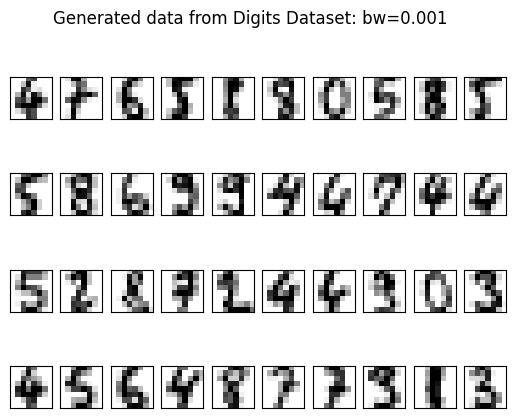

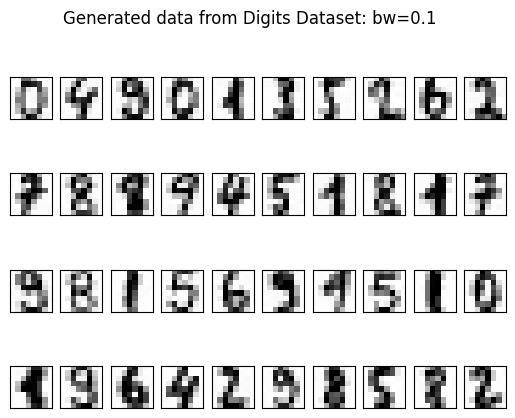

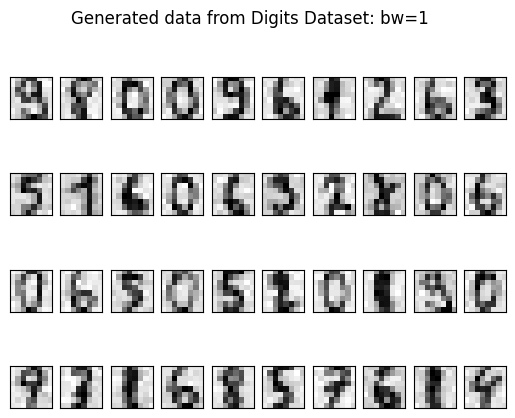

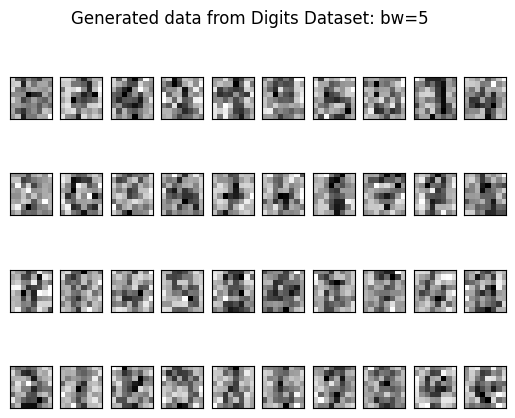

In [55]:
# Case Digits Dataset - Large BW
bandwidth = [ 0.001, 0.1, 1, 5]

for bw in bandwidth:

    kde = KernelDensity(bandwidth=bw).fit(X_digits) #KDE with bandwidth 1.0
    
    # Generate 40 new samples
    new_data = kde.sample(40).reshape((4, 10, -1))
    
    # plot resampled digits
    fig, ax = plt.subplots(4, 10, subplot_kw=dict(xticks=[], yticks=[]))
    for j in range(10):
        for i in range(4):
            im = ax[i, j].imshow(new_data[i, j].reshape((8, 8)),
                        cmap=plt.cm.binary, interpolation='nearest')
    fig.suptitle(f"Generated data from Digits Dataset: bw={bw}")
    plt.show()

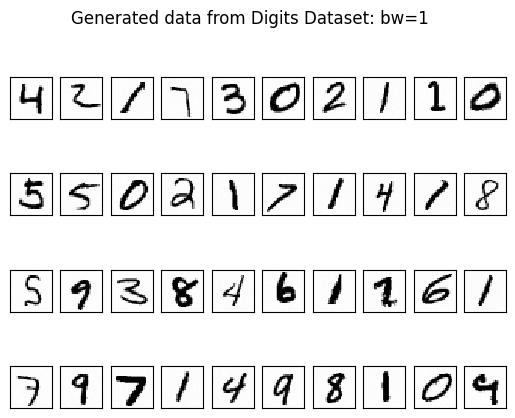

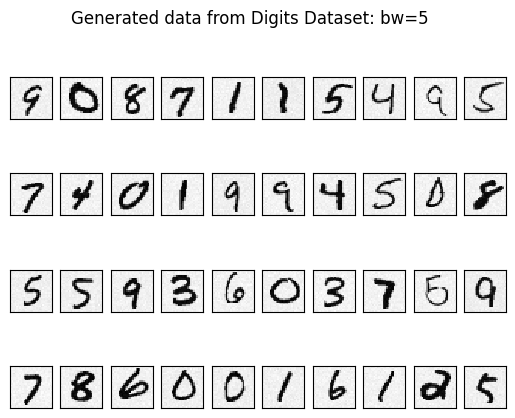

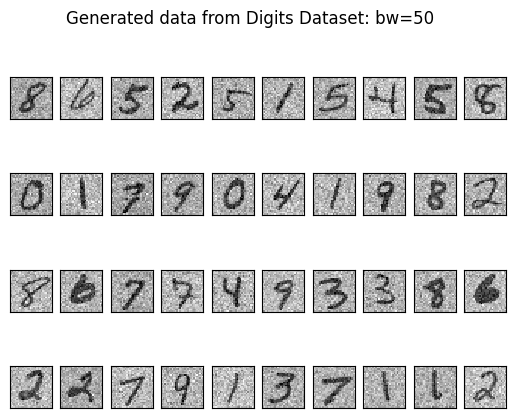

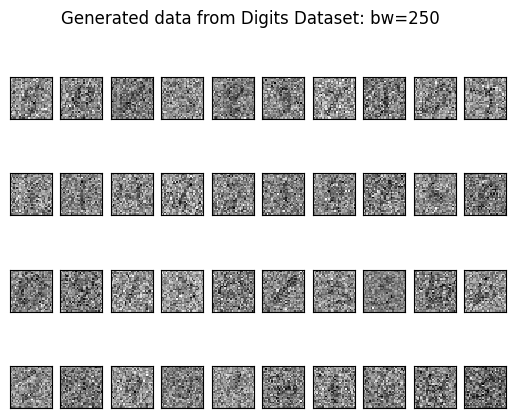

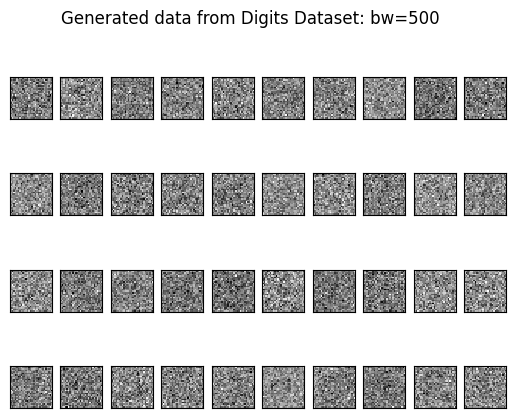

In [56]:
# Case MNIST Dataset - Large BW
bandwidth = [1, 5, 50, 250, 500]

for bw in bandwidth:
    kde = KernelDensity(bandwidth=bw).fit(X_mnist) #KDE with bandwidth 1.0
    
    # Generate 40 new samples
    new_data = kde.sample(40).reshape((4, 10, -1))
    
    # plot resampled digits
    fig, ax = plt.subplots(4, 10, subplot_kw=dict(xticks=[], yticks=[]))
    for j in range(10):
        for i in range(4):
            im = ax[i, j].imshow(new_data[i, j].reshape((28, 28)),
                        cmap=plt.cm.binary, interpolation='nearest')
    fig.suptitle(f"Generated data from Digits Dataset: bw={bw}")
    plt.show()

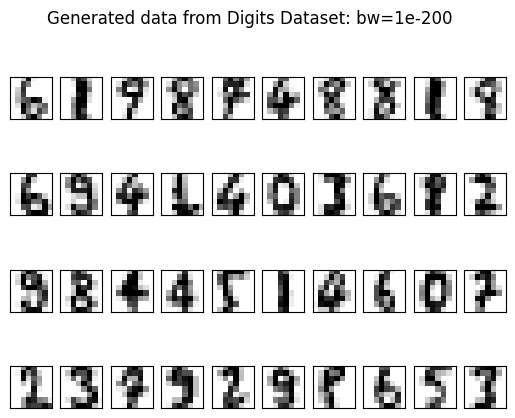

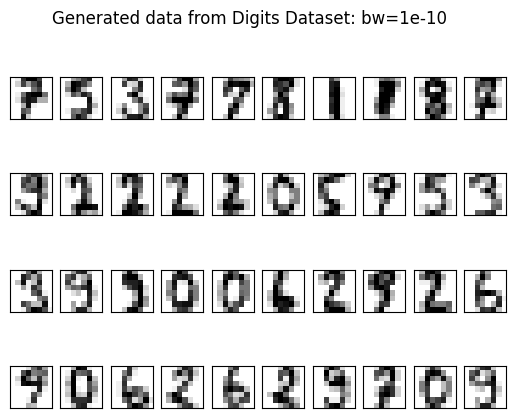

In [57]:
# Case Digits Dataset - Small BW
bandwidth = [ 1E-200, 1E-10]

for bw in bandwidth:
    kde = KernelDensity(bandwidth=bw).fit(X_digits) #KDE with bandwidth 1.0
    
    # Generate 40 new samples
    new_data = kde.sample(40).reshape((4, 10, -1))
    
    # plot resampled digits
    fig, ax = plt.subplots(4, 10, subplot_kw=dict(xticks=[], yticks=[]))
    for j in range(10):
        for i in range(4):
            im = ax[i, j].imshow(new_data[i, j].reshape((8, 8)),
                        cmap=plt.cm.binary, interpolation='nearest')
    fig.suptitle(f"Generated data from Digits Dataset: bw={bw}")
    plt.show()

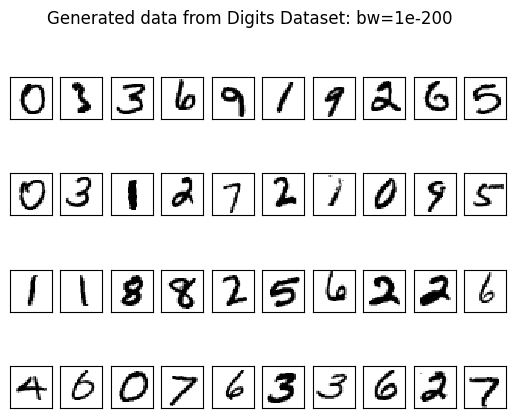

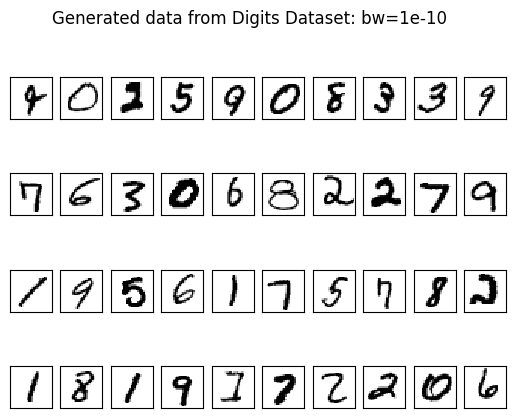

In [58]:
# Case MNIST Dataset - Small BW
bandwidth = [ 1E-200, 1E-10]
for bw in bandwidth:

    kde = KernelDensity(bandwidth=bw).fit(X_mnist) #KDE with bandwidth 1.0
    
    # Generate 40 new samples
    new_data = kde.sample(40).reshape((4, 10, -1))
    
    # plot resampled digits
    fig, ax = plt.subplots(4, 10, subplot_kw=dict(xticks=[], yticks=[]))
    for j in range(10):
        for i in range(4):
            im = ax[i, j].imshow(new_data[i, j].reshape((28, 28)),
                        cmap=plt.cm.binary, interpolation='nearest')
    fig.suptitle(f"Generated data from Digits Dataset: bw={bw}")
    plt.show()

#### Conclusions:
Discuss what you have learned concerning the generation of random digits using KDE. How sensitive
is the generative model to the Gaussian bandwidth and the dimension of the feature space?

Answer:\
The dimensionality of the feature space plays a significant role in generated image quality if that number of *principal components* is below or near the inflection of the PCA *explained variance* plot. When reducing dimensionality of the feature space for dimension while staying larger than that point the dimensionality has little effect on the distinguishability of the generated images.\
The bandwidth becomes a problem for generated image quality when it is too large. That point at which the bandwidth value is too large is a positively related the the number of features. That is, if bandwidth can be larger without hurting performance for images with lots features when compared to images with less features. For the two datasets used during these experiments the bandwidth appraoching zeros doesn't appear to have a negative effect on generated image quality. I found this result to be suprising and suspect there may be a trade off for reducing bandwidth that isn't illiustrated by these experiments. Perhaps these datasets are just so that they are resiliant to very very small bandwidth values.  

## Exercise 1.2
